In [1]:
%autosave 1000000

Autosaving every 1000000 seconds


# Test IVisual-Jupyter Travelling Wave

This notebook is set up to test the visualization of a QM travelling wave. The arrows represent phasors (y and z are the real and imaginary parts of the complex wavefunction respectively). The first next cell just sets up the arrows and the following cell does the animation, while tracking in the time between calls to 'rate()'.

In [4]:
"""
Execute this cell only once to set up the arrows
"""

%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
from ivisual import *

scene = canvas(title = "Travelling Wave")

L=30.0                          # range of x is 6 units
x = np.linspace(-L/2, L/2, 100) # from -3 to +3
k = -3*pi/L                    # set up the wave number
psi = np.exp(1j*k*x)           # set up the initial wave function
rows = 10

alist = []                     # an empty list for our arrow objects

omega = 2*pi                   # 1 rev/sec
t=0.0                          # start t at zero
dt=0.01                        # 1/100 of a second per step

def once(r=30):  #
    global t
    rate(r)
    t+=dt
    psi_t = psi*np.exp(-1j*omega*t) # evolve the wf in time
    for r in range(rows):
        psi_t = psi*np.exp(-1j*(omega*(1+(r+1.)/(rows+1.0))*t)) # evolve the wf in time
        for i in range(len(x)):
            SetArrowFromCN(psi_t[i], alist[r*100 + i]) # move the arrows to match

def SetArrowFromCN( cn, a):
    """
    SetArrowWithCN takes a complex number  cn  and an arrow object  a .
    It sets the  y  and  z  components of the arrow s axis to the real 
    and imaginary parts of the given complex number. 
    """
    a.axis.y = cn.real
    a.axis.z = cn.imag
    
for r in range(rows):
    for i in range(len(x)):
        xi = x[i]                              
        a = arrow(pos=vector(xi, (r-(rows-1)/2)*2.0, 0),       # on the y,z axis at location 'x'
                    axis=vector(0,1,0),       # pointing in the 'real' direction
                    color=color.red)          # make it red. ;->
        alist.append(a)                       # add to list
        SetArrowFromCN( psi[i], a)            # set up arrow from wave function



<IPython.core.display.Javascript object>

Done!
[0.0073901547391999507, 0.0062482784369307653, 0.0064865172465771439]
average :  0.0335559997559
median :  0.0329999923706
mean :  0.0335559997559
std dev :  0.00648651724658
variance:  4.20749059901e-05
average dev:  0.00670831680757
median dev:  0.00648651724658
mean dev:  0.00670831680757
dev std dev :  0.000491844593588


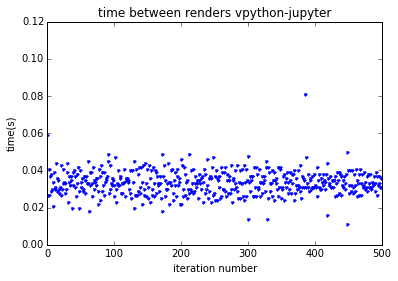

In [5]:
"""
Execute this cell to evolve the WF in time
"""
from time import time, sleep

evt = threading.Event()

def set_event(e):
    e.set()


tlist2 = []
for j in range(3):
    
    tlist=[time()]
    for i in range(500):
        once(30)
        tlist.append(time())
    
    tarr = np.array(tlist)
    dts = tarr[1:]-tarr[:-1]
    tlist2.append(np.std(dts))
    
    evt.clear()
    threading.Timer(10, set_event, args=(evt,)).start()
    evt.wait()
        
    
print("Done!")
print(tlist2)

tarr = np.array(tlist)
dts = tarr[1:]-tarr[:-1]
pl.plot(range(len(dts)), dts, 'b.')
pl.title("time between renders vpython-jupyter")
pl.xlabel("iteration number")
pl.ylabel("time(s)")#
pl.ylim([0.0,0.12])

print ("average : ", np.average(dts))
print ("median : ", np.median(dts))
print ("mean : ", np.mean(dts))
print ("std dev : ", np.std(dts))
print ("variance: ", np.var(dts))

tarr2 = np.array(tlist2)

print ("average dev: ", np.average(tarr2))
print ("median dev: ", np.median(tarr2))
print ("mean dev: ", np.mean(tarr2))
print ("dev std dev : ", np.std(tarr2))
